In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ipywidgets as widgets
from scipy import stats
from scipy.stats import spearmanr

In [2]:
circulatory = pd.read_csv('circulatory_for_modeling_new.csv')

In [3]:
circulatory.describe()

Year        Gender    Age Group  Deaths_per_10,000  \
count  12036.000000  12036.000000  12036.00000       12036.000000   
mean    2007.486707      0.519359     61.37097         142.465297   
std        5.190872      0.499646     20.22216         227.038166   
min     1999.000000      0.000000      0.50000           0.121181   
25%     2003.000000      0.000000     50.00000           5.811065   
50%     2007.000000      1.000000     60.00000          29.955410   
75%     2012.000000      1.000000     80.00000         160.805948   
max     2016.000000      1.000000     90.00000         988.017183   

       Emissions_CO_per_capita  Emissions_PM10_per_capita        Alaska  \
count             12036.000000               12036.000000  12036.000000   
mean                  0.059871                   0.017343      0.016534   
std                   0.131920                   0.037557      0.127521   
min                   0.000597                   0.000055      0.000000   
25%                   0.013694                   0.002275      0.000000   
50%                   0.025540                   0.005732      0.000000   
75%                   0.057805                   0.016032      0.000000   
max                   6.592920                   0.824887      1.000000   

            Arizona      Arkansas    California  ...  South Dakota  \
count  12036.000000  12036.000000  12036.000000  ...  12036.000000   
mean       0.020854      0.019940      0.028830  ...      0.015703   
std        0.142902      0.139801      0.167336  ...      0.124329   
min        0.000000      0.000000      0.000000  ...      0.000000   
25%        0.000000      0.000000      0.000000  ...      0.000000   
50%        0.000000      0.000000      0.000000  ...      0.000000   
75%        0.000000      0.000000      0.000000  ...      0.000000   
max        1.000000      1.000000      1.000000  ...      1.000000   

          Tennessee         Texas          Utah       Vermont      Virginia  \
count  12036.000000  12036.000000  12036.000000  12036.000000  12036.000000   
mean       0.020937      0.027252      0.017780      0.014374      0.021436   
std        0.143180      0.162822      0.132156      0.119030      0.144838   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Washington  West Virginia     Wisconsin       Wyoming  
count  12036.000000   12036.000000  12036.000000  12036.000000  
mean       0.019857       0.018362      0.019359      0.014457  
std        0.139515       0.134261      0.137788      0.119368  
min        0.000000       0.000000      0.000000      0.000000  
25%        0.000000       0.000000      0.000000      0.000000  
50%        0.000000       0.000000      0.000000      0.000000  
75%        0.000000       0.000000      0.000000      0.000000  
max        1.000000       1.000000      1.000000      1.000000  

[8 rows x 56 columns]

In [4]:
# Calculate Spearman's rank correlation for each column
for column in circulatory.columns:
    correlation_coefficient, p_value = spearmanr(circulatory[column], circulatory['Deaths_per_10,000'])
    print("Column:", column)
    print("Spearman's rank correlation coefficient:", correlation_coefficient)
    print("p-value:", p_value)
    print()

Column: Year
Spearman's rank correlation coefficient: -0.06291165673169143
p-value: 4.912470589122922e-12

Column: Gender
Spearman's rank correlation coefficient: 0.08330762168615222
p-value: 5.45909239330995e-20

Column: Age Group
Spearman's rank correlation coefficient: 0.9761866387644033
p-value: 0.0

Column: Deaths_per_10,000
Spearman's rank correlation coefficient: 1.0
p-value: 0.0

Column: Emissions_CO_per_capita
Spearman's rank correlation coefficient: 0.7692337936498969
p-value: 0.0

Column: Emissions_PM10_per_capita
Spearman's rank correlation coefficient: 0.61779784806828
p-value: 0.0

Column: Alaska
Spearman's rank correlation coefficient: 0.02576286033731511
p-value: 0.0047047166073746665

Column: Arizona
Spearman's rank correlation coefficient: -0.02495489758267595
p-value: 0.006183071338819697

Column: Arkansas
Spearman's rank correlation coefficient: 0.021108684094773005
p-value: 0.02056788652076241

Column: California
Spearman's rank correlation coefficient: -0.09765319

<AxesSubplot:xlabel='Emissions_PM10_per_capita', ylabel='Deaths_per_10,000'>

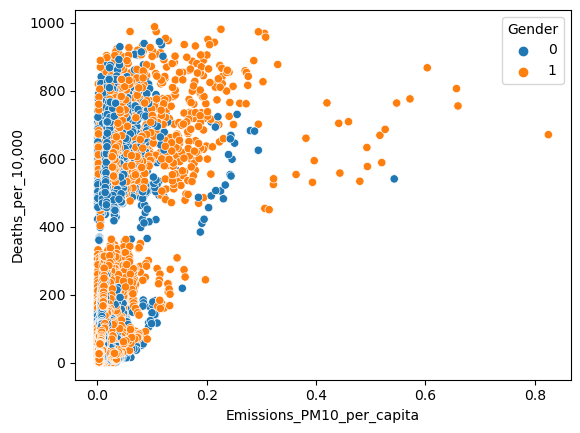

In [5]:
sns.scatterplot(data = circulatory, y = 'Deaths_per_10,000', x = 'Emissions_PM10_per_capita', hue = 'Gender')

<AxesSubplot:xlabel='Emissions_CO_per_capita', ylabel='Deaths_per_10,000'>

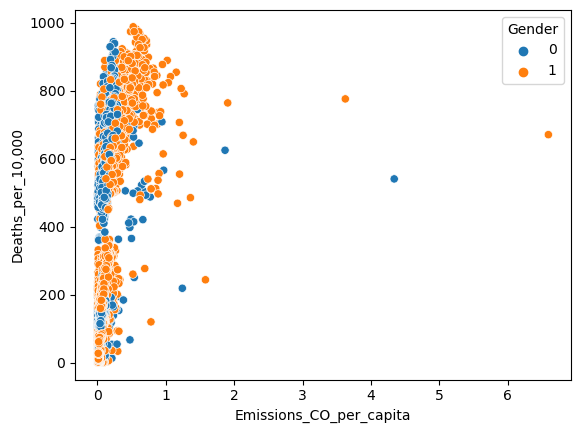

In [6]:
sns.scatterplot(data = circulatory, y = 'Deaths_per_10,000', x = 'Emissions_CO_per_capita', hue = 'Gender')

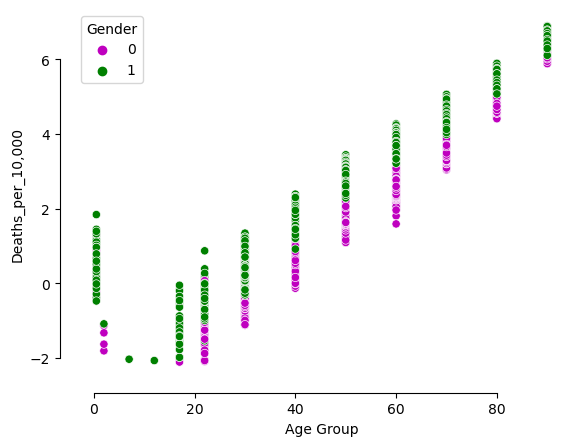

In [7]:
sns.scatterplot(y=np.log(circulatory['Deaths_per_10,000']), x="Age Group",
            hue="Gender", palette=["m", "g"],
            data=circulatory)
sns.despine(offset=10, trim=True)

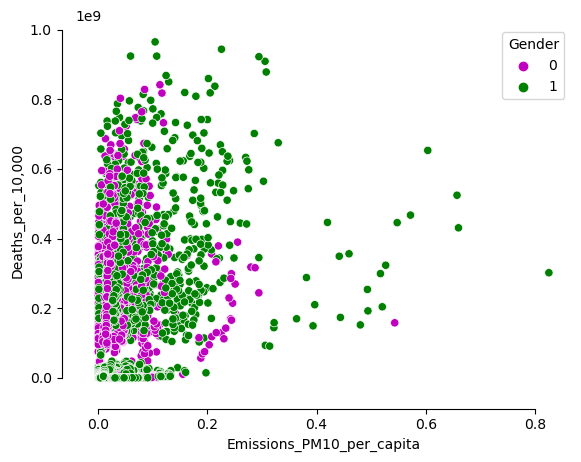

In [8]:
sns.scatterplot(y=(circulatory['Deaths_per_10,000']**3), x=circulatory['Emissions_PM10_per_capita'],
            hue="Gender", palette=["m", "g"],
            data=circulatory)
sns.despine(offset=10, trim=True)

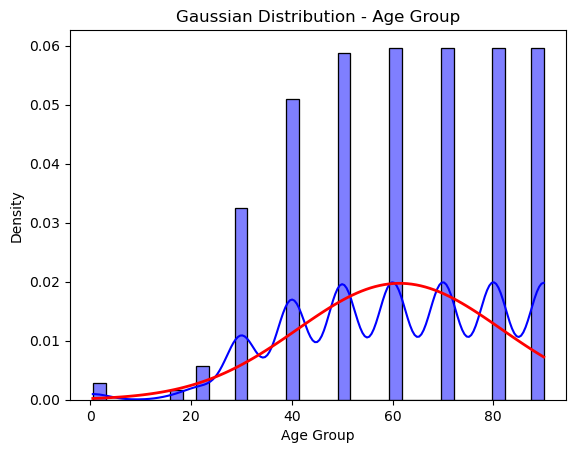

In [113]:
from scipy.stats import norm

# Assuming you have the 'Age' and 'BMI' variables in separate NumPy arrays
age_values = np.array(circulatory['Age Group'])


# Plot Gaussian distribution curve for 'BMI'
sns.histplot(age_values, kde=True, stat="density", color='blue')
plt.title('Gaussian Distribution - Age Group')
plt.xlabel('Age Group')
plt.ylabel('Density')
x_axis = np.linspace(age_values.min(), age_values.max(), 100)
plt.plot(x_axis, norm.pdf(x_axis, age_values.mean(), age_values.std()), color='red', linewidth=2)
plt.show()


In [9]:
# Specify the column name for the box plot
column_name = 'Age Group'  # Replace 'ColumnName' with the actual name of your column

# Create the box trace
box_trace = go.Box(y=circulatory[column_name], name=column_name)

# Create the figure
fig = go.Figure(data=[box_trace])

# Update the layout and axis labels
fig.update_layout(
    title='Box Plot of ' + column_name,
    yaxis_title=column_name
)

# Show the plot
fig.show()


In [10]:
# Specify the column name for the box plot
column_name = 'Emissions_PM10_per_capita'  # Replace 'ColumnName' with the actual name of your column

# Create the box trace
box_trace = go.Box(y=circulatory[column_name], name=column_name)

# Create the figure
fig = go.Figure(data=[box_trace])

# Update the layout and axis labels
fig.update_layout(
    title='Box Plot of ' + column_name,
    yaxis_title=column_name
)

# Show the plot
fig.show()


In [11]:
# Specify the column name for the box plot
column_name = 'Emissions_CO_per_capita'  # Replace 'ColumnName' with the actual name of your column

# Create the box trace
box_trace = go.Box(y=circulatory[column_name], name=column_name)

# Create the figure
fig = go.Figure(data=[box_trace])

# Update the layout and axis labels
fig.update_layout(
    title='Box Plot of ' + column_name,
    yaxis_title=column_name
)

# Show the plot
fig.show()


In [21]:
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers using the Z-score method.
    Returns a boolean array where True indicates an outlier.
    """
    z_scores = (data - np.mean(data)) / np.std(data)
    return np.abs(z_scores) > threshold

def detect_outliers_modified_zscore(data, threshold=3.5):
    """
    Detect outliers using the modified Z-score method.
    Returns a boolean array where True indicates an outlier.
    """
    median = np.median(data)
    median_absolute_deviation = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / median_absolute_deviation
    return np.abs(modified_z_scores) > threshold

# Detect outliers using the Z-score method
zscore_outliers = detect_outliers_zscore(circulatory['Emissions_PM10_per_capita'])

# Detect outliers using the modified Z-score method
modified_zscore_outliers = detect_outliers_modified_zscore(circulatory['Emissions_PM10_per_capita'])

# Print the indices of the outliers
print("Z-score outliers:", np.where(zscore_outliers)[0])
print("Modified Z-score outliers:", np.where(modified_zscore_outliers)[0])


Z-score outliers: [  234   235   236   309   327   328   329   331   415   433   434   435
   436   437   438   439   440   441   443   444   445   447   448   924
   925   926  1505  1506  1507  2711  2712  2713  3025  3026  3027  3133
  3134  3135  3136  3137  3138  3139  3140  3141  3142  3143  3144  3145
  3146  3147  3148  3149  3150  3667  3668  3669  4100  4101  4102  4103
  4104  4105  4106  4107  4108  4109  4110  4111  4112  4113  4117  4597
  4598  4599  5797  5798  5799  6044  6045  6046  6047  6048  6049  6050
  6051  6052  6053  6055  6294  6295  6296  6297  6298  6299  6300  6301
  6302  6303  6304  6305  6306  6307  6487  6488  6489  6490  6491  6492
  6493  6494  6495  6496  6497  6498  6499  6500  6501  6502  6503  6504
  6703  6704  6705  6706  6707  6708  6709  6710  6711  6712  6713  6714
  6716  6946  6947  7494  7495  7496  7604  7605  7606  8325  8326  8327
  8328  8329  8330  8331  8332  8333  8334  8335  8336  8337  8338  8339
  8340  8341  8342  8817  8818  8

In [22]:
# Form a new DataFrame from the list of indices
new_df = circulatory.loc[modified_zscore_outliers]

new_df

Year  Gender  Age Group  Deaths_per_10,000  Emissions_CO_per_capita  \
107    1999       0       90.0         816.339219                 0.374477   
108    2000       0       90.0         806.356680                 0.275839   
109    2001       0       90.0         805.392468                 0.264043   
110    2002       0       90.0         842.703597                 0.303913   
111    2003       0       90.0         845.028932                 0.290972   
...     ...     ...        ...                ...                      ...   
12031  2012       1       90.0         594.405594                 0.201541   
12032  2013       1       90.0         524.314045                 0.185597   
12033  2014       1       90.0         453.952518                 0.164659   
12034  2015       1       90.0         450.267108                 0.155445   
12035  2016       1       90.0         541.152781                 0.124213   

       Emissions_PM10_per_capita  Alaska  Arizona  Arkansas  California  ...  \
107                     0.071121       0        0         0           0  ...   
108                     0.061174       0        0         0           0  ...   
109                     0.057568       0        0         0           0  ...   
110                     0.031072       0        0         0           0  ...   
111                     0.030759       0        0         0           0  ...   
...                          ...     ...      ...       ...         ...  ...   
12031                   0.396621       0        0         0           0  ...   
12032                   0.321820       0        0         0           0  ...   
12033                   0.306184       0        0         0           0  ...   
12034                   0.314116       0        0         0           0  ...   
12035                   0.322261       0        0         0           0  ...   

       South Dakota  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
107               0          0      0     0        0         0           0   
108               0          0      0     0        0         0           0   
109               0          0      0     0        0         0           0   
110               0          0      0     0        0         0           0   
111               0          0      0     0        0         0           0   
...             ...        ...    ...   ...      ...       ...         ...   
12031             0          0      0     0        0         0           0   
12032             0          0      0     0        0         0           0   
12033             0          0      0     0        0         0           0   
12034             0          0      0     0        0         0           0   
12035             0          0      0     0        0         0           0   

       West Virginia  Wisconsin  Wyoming  
107                0          0        0  
108                0          0        0  
109                0          0        0  
110                0          0        0  
111                0          0        0  
...              ...        ...      ...  
12031              0          0        1  
12032              0          0        1  
12033              0          0        1  
12034              0          0        1  
12035              0          0        1  

[1819 rows x 56 columns]

In [23]:
# Extract the predictor variables
predictors = circulatory[['Age Group', 'Gender', 'Emissions_CO_per_capita', 'Emissions_PM10_per_capita']]

# Calculate the VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Print the VIF values
print(vif)


                    Variable       VIF
0                  Age Group  2.205711
1                     Gender  1.825026
2    Emissions_CO_per_capita  2.345250
3  Emissions_PM10_per_capita  2.372605


# Non-Parametric Regression Model
1. Decision Tree
2. Random Forest
3. SVR

In [24]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = circulatory.drop(['Deaths_per_10,000', 'Year', 'Age Group'], axis = 1)
y = circulatory['Deaths_per_10,000']

# Splitting the data into train and test sets
train_data = circulatory[circulatory['Year'] <= 2013]
test_data = circulatory[circulatory['Year'] > 2013]

X_train = train_data.drop(['Deaths_per_10,000', 'Year'], axis = 1)
y_train = train_data['Deaths_per_10,000']

X_test = test_data.drop(['Deaths_per_10,000', 'Year'], axis = 1)
y_test = test_data['Deaths_per_10,000']


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
# Create a decision tree regressor
tree = DecisionTreeRegressor(criterion = 'friedman_mse')

# Fit the model to the training data
tree.fit(X_train, y_train)

# Predict on the test data
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 452.17959908221945


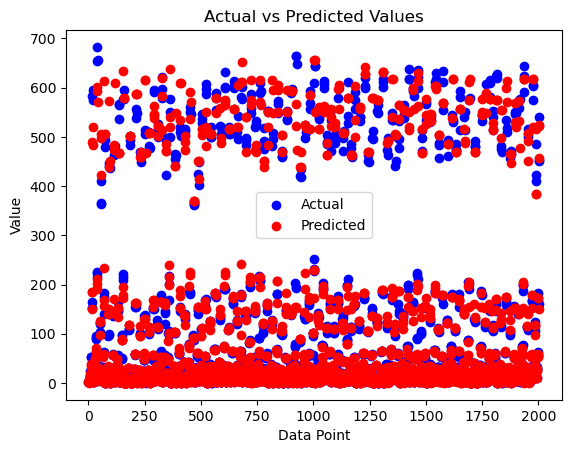

In [26]:

# Plot the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot the predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [27]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print the accuracy metrics
print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 0.9868228687481865
Mean Squared Error: 452.17959908221945


In [28]:
# Calculate the regular R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate the number of observations (n) and number of predictors (p)
n = len(y_test)
p = train_data.shape[1]  # Assuming X is the matrix of independent variables

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.9864440600469023


In [29]:
# Train your decision tree model (replace 'X' and 'y' with your data)
# model = DecisionTreeRegressor()
# model.fit(X, y)

# Get the feature importances
importances = tree.feature_importances_

# Get the feature names
feature_names = np.array(X_train.columns)

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

Age Group: 0.9494027928014328
Emissions_CO_per_capita: 0.02237345669554341
Emissions_PM10_per_capita: 0.0065063547740662545
Gender: 0.006299173725736215
Alaska: 0.00202529425008013
Minnesota: 0.0012198300003442894
Colorado: 0.0009727015485005992
New York: 0.000948720963100753
Utah: 0.0005972063760119932
Iowa: 0.0005852082637765714


In [30]:
# from sklearn import tree
# import matplotlib.pyplot as plt

# # Train your decision tree model (replace 'X' and 'y' with your data)
# model = DecisionTreeRegressor()
# model.fit(X, y)

# # Plot the decision tree
# tree.plot_tree(model, feature_names=X.columns, filled=True)
# #plt.show()
# # Save the image
# plt.savefig('decision_tree.png', dpi = 2400)

# Random Forest

In [165]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf_model = RandomForestRegressor(max_depth = 7, n_estimators = 500, verbose = 1, n_jobs = -1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.0s


Mean Squared Error: 735.0841476119733
R2 Score: 0.9785786437206134


[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.0s finished


In [166]:
# Calculate the regular R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate the number of observations (n) and number of predictors (p)
n = len(y_test)
p = train_data.shape[1]  # Assuming X is the matrix of independent variables

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.9779628347105284


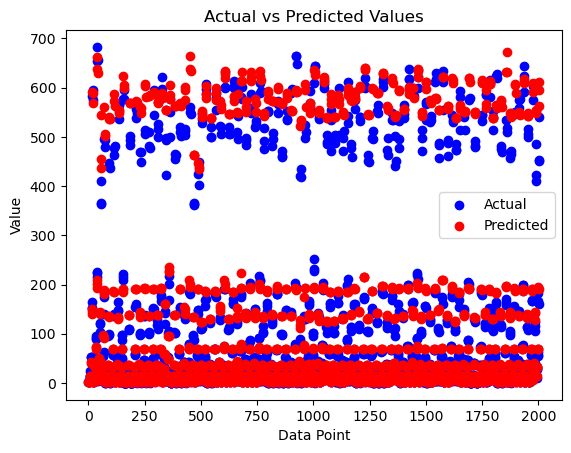

In [148]:
# import plotly.graph_objects as go

# # Creating the scatter plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual'))
# fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Predicted'))

# # Setting layout and labels
# fig.update_layout(
#     title='Actual vs Predicted Values',
#     xaxis_title='Actual Values',
#     yaxis_title='Predicted Values',
# )

# # Display the plot
# fig.show()



# Plot the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot the predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [149]:

# Get the feature importances
importances = rf_model.feature_importances_

# Get the feature names
feature_names = np.array(X_train.columns)

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

Age Group: 0.9652170449649877
Emissions_CO_per_capita: 0.019356365045948936
Gender: 0.005761487821725828
Emissions_PM10_per_capita: 0.0030446610510888646
Alaska: 0.002532385665796707
Minnesota: 0.0006737225461052751
New York: 0.0005779720276726904
Hawaii: 0.0004247417676288435
Colorado: 0.000411238757862334
Oklahoma: 0.000261073124116886


# SVR

In [167]:
from sklearn.svm import SVR

# Create an SVM regressor
svm_model = SVR(kernel = 'poly', degree = 2, gamma = 'auto', C = 2)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 11684.163991988586
R2 Score: 0.6595074992267589


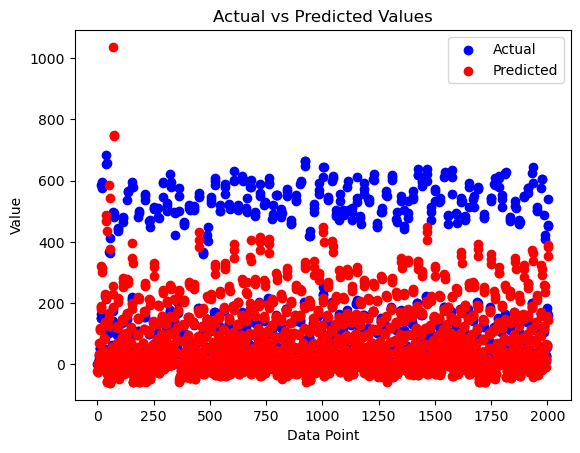

In [168]:
# import plotly.graph_objects as go

# # Creating the scatter plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual'))
# fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Predicted'))

# # Setting layout and labels
# fig.update_layout(
#     title='Actual vs Predicted Values',
#     xaxis_title='Actual Values',
#     yaxis_title='Predicted Values',
# )

# # Display the plot
# fig.show()



# Plot the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot the predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [169]:
# Calculate the regular R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate the number of observations (n) and number of predictors (p)
n = len(y_test)
p = train_data.shape[1]  # Assuming X is the matrix of independent variables

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.6497192137835857


# removing outliers with 95 percentile value

In [31]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df' and a column named 'column_name'
# Replace 'df' and 'column_name' with the actual names of your DataFrame and column

# Calculate the 90th percentile value
percentile_90 = np.percentile(circulatory['Emissions_PM10_per_capita'], 90)

# Replace values greater than the 90th percentile with the 90th percentile value
circulatory.loc[circulatory['Emissions_PM10_per_capita'] > percentile_90, 'Emissions_PM10_per_capita'] = percentile_90


In [32]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df' and a column named 'column_name'
# Replace 'df' and 'column_name' with the actual names of your DataFrame and column

# Calculate the 90th percentile value
percentile_90 = np.percentile(circulatory['Emissions_CO_per_capita'], 90)

# Replace values greater than the 90th percentile with the 90th percentile value
circulatory.loc[circulatory['Emissions_CO_per_capita'] > percentile_90, 'Emissions_CO_per_capita'] = percentile_90


In [33]:
def create_box_plot(data, column_name):
    # Create the box trace
    box_trace = go.Box(y=data[column_name], name=column_name)

    # Create the figure
    fig = go.Figure(data=[box_trace])

    # Update the layout and axis labels
    fig.update_layout(
        title='Box Plot of ' + column_name,
        yaxis_title=column_name)
    # Show the plot
    fig.show()

In [34]:
create_box_plot(circulatory, 'Emissions_CO_per_capita')


In [35]:
create_box_plot(circulatory, 'Emissions_PM10_per_capita')

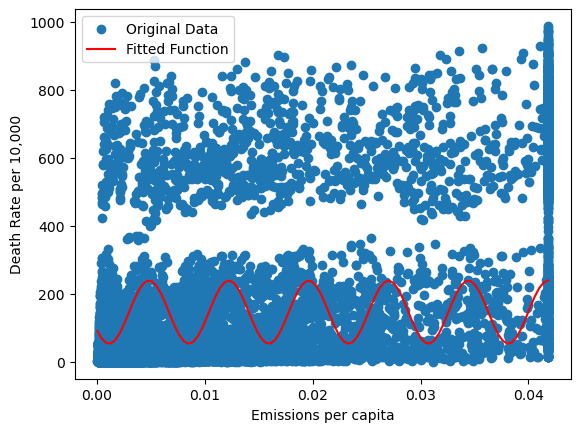

In [82]:

from scipy.optimize import curve_fit

# Extract the data from the dataframe
x = circulatory['Emissions_PM10_per_capita'].values
y = circulatory['Deaths_per_10,000'].values

# Define the non-linear function
def non_linear_function(x, a, b, c):
    return (a + 10)*np.cos( (b*x+1000) ) + c  # Replace this with your own non-linear function

# Fit the non-linear function to the data
maxfev = 10000  # Increase the maximum number of function evaluations
popt, pcov = curve_fit(non_linear_function, x, y, maxfev=maxfev)

# Extract the optimized parameters
a_opt, b_opt, c_opt = popt

# Generate data points for the fitted function
x_fit = np.linspace(min(x), max(x), 100)
y_fit = non_linear_function(x_fit, a_opt, b_opt, c_opt)

# Plot the original data and the fitted function
plt.scatter(x, y, label='Original Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Function')
plt.xlabel('Emissions per capita')
plt.ylabel('Death Rate per 10,000')
plt.legend()
plt.show()

\$ f(x) = (a + 10) \cdot \cos(b \cdot x + 1000) + c\$


In [68]:
circulatory.columns

Index(['Gender', 'Age Group', 'Deaths_per_10,000', 'Emissions_CO_per_capita',
       'Emissions_PM10_per_capita', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

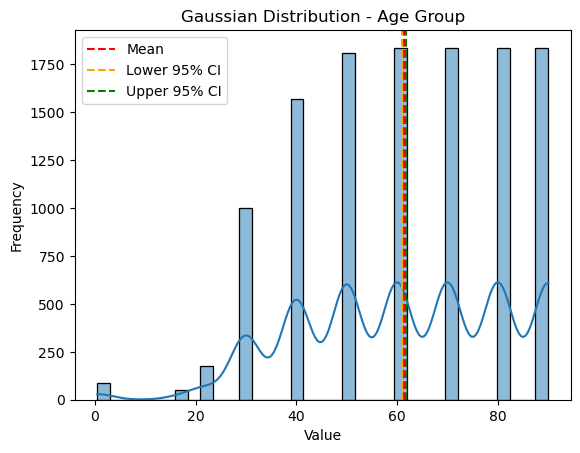

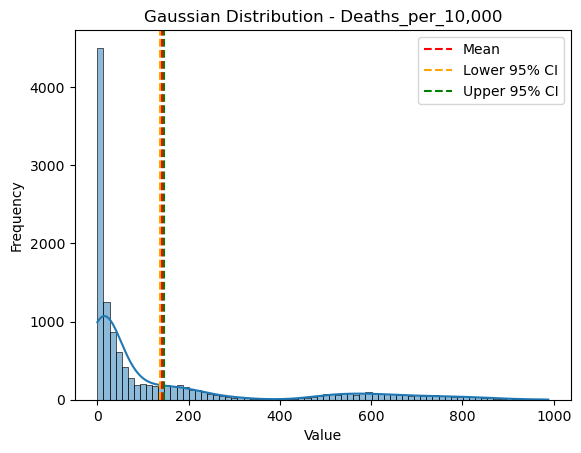

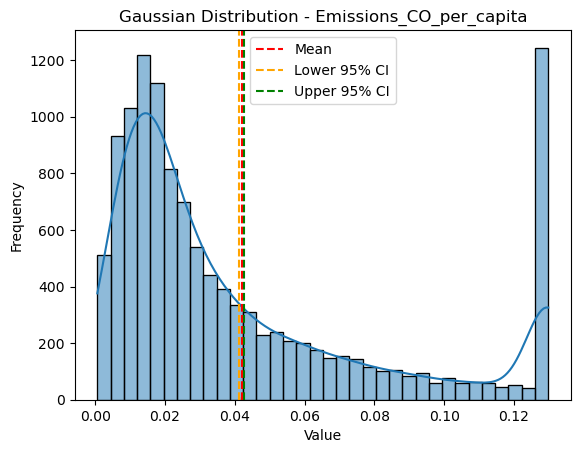

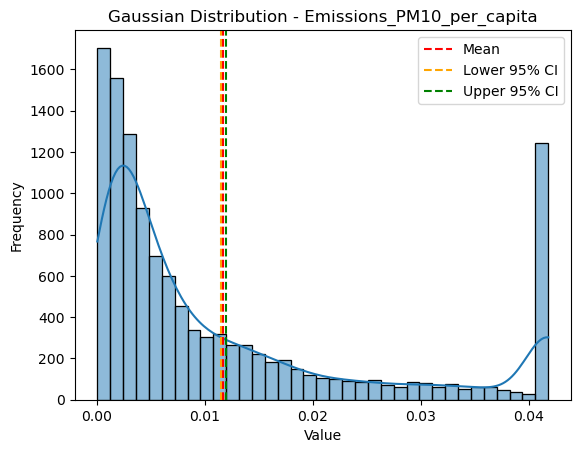

In [77]:
# Iterate over each column in the dataframe

Columns_ = ['Age Group', 'Deaths_per_10,000', 'Emissions_CO_per_capita', 'Emissions_PM10_per_capita']

# Define the confidence level
confidence_level = 0.95

# Iterate over each column in the dataframe
for column in Columns_:
    # Plot the Gaussian distribution for the column
    sns.histplot(data=circulatory[column], kde=True)
    plt.title(f"Gaussian Distribution - {column}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    # Calculate the mean and standard deviation
    mean = circulatory[column].mean()
    std = circulatory[column].std()

    # Calculate the confidence interval
    n = len(circulatory[column])
    stderr = std / np.sqrt(n)
    margin_error = stderr * stats.t.ppf((1 + confidence_level) / 2, n - 1)
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error

    # Add vertical lines for mean and confidence intervals
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.axvline(lower_bound, color='orange', linestyle='--', label='Lower 95% CI')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper 95% CI')

    # Shade the confidence interval area
    x = np.linspace(lower_bound, upper_bound, 100)
    plt.fill_between(x, stats.norm.pdf(x, mean, std), alpha=0.3)

    # Display the legend
    plt.legend()

    plt.show()

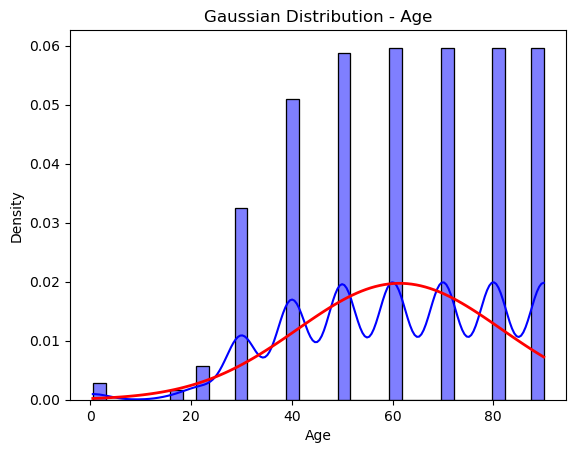

In [94]:
# Assuming you have the 'Age' variable in a NumPy array
age_values = np.array(circulatory['Age Group'])


# Plot Gaussian distribution curve for 'Age'
sns.histplot(age_values, kde=True, stat="density", color='blue')
plt.title('Gaussian Distribution - Age')
plt.xlabel('Age')
plt.ylabel('Density')
x_axis = np.linspace(age_values.min(), age_values.max(), 100)
plt.plot(x_axis, norm.pdf(x_axis, age_values.mean(), age_values.std()), color='red', linewidth=2)
plt.show()

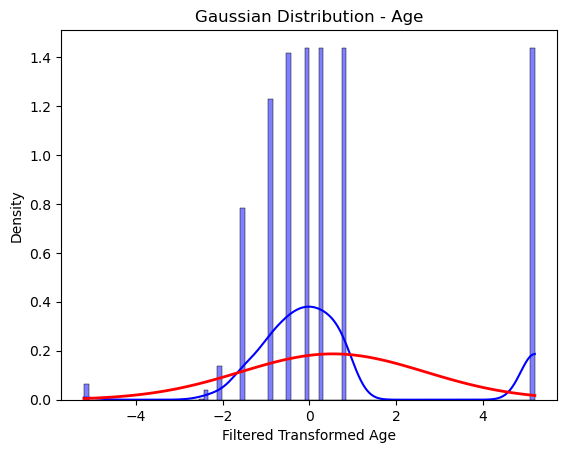

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

# Initialize the quantile transformer
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit and transform the 'Age' column in the DataFrame
circulatory['transformed_age'] = quantile_transformer.fit_transform(circulatory['Age Group'].values.reshape(-1, 1)).flatten()

# Compute the z-scores of the transformed 'Age' variable
z_scores = np.abs((circulatory['transformed_age'] - np.mean(circulatory['transformed_age'])) / np.std(circulatory['transformed_age']))

# Define a threshold for outlier detection (e.g., z-score > 3)
outlier_threshold = 3

# Identify the indices of the outliers
outlier_indices = np.where(z_scores > outlier_threshold)[0]

# Remove the outliers from the DataFrame
df_filtered = circulatory.drop(outlier_indices)

# Plot Gaussian distribution curve for 'transformed_age'
sns.histplot(df_filtered['transformed_age'], kde=True, stat="density", color='blue')
plt.title('Gaussian Distribution - Age')
plt.xlabel('Filtered Transformed Age')
plt.ylabel('Density')
x_axis = np.linspace(df_filtered['transformed_age'].min(), df_filtered['transformed_age'].max(), 100)
plt.plot(x_axis, norm.pdf(x_axis, df_filtered['transformed_age'].mean(), df_filtered['transformed_age'].std()), color='red', linewidth=2)
plt.show()


In [95]:
df_filtered

Gender  Age Group  Deaths_per_10,000  Emissions_CO_per_capita  \
0           0       30.0           1.774326                 0.045801   
1           0       30.0           1.487063                 0.028070   
2           0       30.0           1.396967                 0.027320   
3           0       30.0           1.614748                 0.032975   
4           0       30.0           1.909879                 0.026834   
...       ...        ...                ...                      ...   
12031       1       90.0         594.405594                 0.129824   
12032       1       90.0         524.314045                 0.129824   
12033       1       90.0         453.952518                 0.129824   
12034       1       90.0         450.267108                 0.129824   
12035       1       90.0         541.152781                 0.124213   

       Emissions_PM10_per_capita  Alaska  Arizona  Arkansas  California  \
0                       0.008699       0        0         0           0   
1                       0.006225       0        0         0           0   
2                       0.005956       0        0         0           0   
3                       0.003371       0        0         0           0   
4                       0.003298       0        0         0           0   
...                          ...     ...      ...       ...         ...   
12031                   0.041827       0        0         0           0   
12032                   0.041827       0        0         0           0   
12033                   0.041827       0        0         0           0   
12034                   0.041827       0        0         0           0   
12035                   0.041827       0        0         0           0   

       Colorado  ...  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
0             0  ...          0      0     0        0         0           0   
1             0  ...          0      0     0        0         0           0   
2             0  ...          0      0     0        0         0           0   
3             0  ...          0      0     0        0         0           0   
4             0  ...          0      0     0        0         0           0   
...         ...  ...        ...    ...   ...      ...       ...         ...   
12031         0  ...          0      0     0        0         0           0   
12032         0  ...          0      0     0        0         0           0   
12033         0  ...          0      0     0        0         0           0   
12034         0  ...          0      0     0        0         0           0   
12035         0  ...          0      0     0        0         0           0   

       West Virginia  Wisconsin  Wyoming  transformed_age  
0                  0          0        0        -1.490335  
1                  0          0        0        -1.490335  
2                  0          0        0        -1.490335  
3                  0          0        0        -1.490335  
4                  0          0        0        -1.490335  
...              ...        ...      ...              ...  
12031              0          0        1         5.199338  
12032              0          0        1         5.199338  
12033              0          0        1         5.199338  
12034              0          0        1         5.199338  
12035              0          0        1         5.199338  

[12036 rows x 56 columns]

In [97]:
# Extract the predictor variables
predictors = circulatory[['Age Group', 'Gender', 'Emissions_CO_per_capita', 'Emissions_PM10_per_capita']]

# Calculate the VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Print the VIF values
print(vif)


                    Variable       VIF
0                  Age Group  4.291596
1                     Gender  1.822680
2    Emissions_CO_per_capita  6.138164
3  Emissions_PM10_per_capita  4.328002
